**PARIKH ARJUN UMESH**

**Exploratory Data Analysis on Dataset - Terrorism**

**DATASET LINK :-** https://bit.ly/2TK5Xn5

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Load the Data

In [ ]:
terror_data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')
terror_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,31,33,76,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
terror_data.rename(columns={'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude',
    'longitude':'Longitude','summary':'Summary','attacktype1_txt':'attackType','targtype1_txt':'targetType','weaptype1_txt':'Weapon','nkill':'Kill',
     'nwound':'Wound'},inplace=True)

In [ ]:
terror_data = terror_data[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude',"attackType",'Kill',
               'Wound','target1','Summary','Group','targetType','Weapon','motive']]
terror_data.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,attackType,Kill,Wound,target1,Summary,Group,targetType,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
terror_data.shape

(14259, 18)

In [ ]:
terror_data.isnull().sum()

Year              0
Month             0
Day               0
Country           0
State            64
Region            0
City              1
Latitude        487
Longitude       487
attackType        1
Kill           2084
Wound          3467
target1         143
Summary       13346
Group             1
targetType        1
Weapon            1
motive        13612
dtype: int64

In [ ]:
terror_data['Wound'] = terror_data['Wound'].fillna(0)
terror_data['Kill'] = terror_data['Kill'].fillna(0)

**Visualize Data**

City with the most attacks

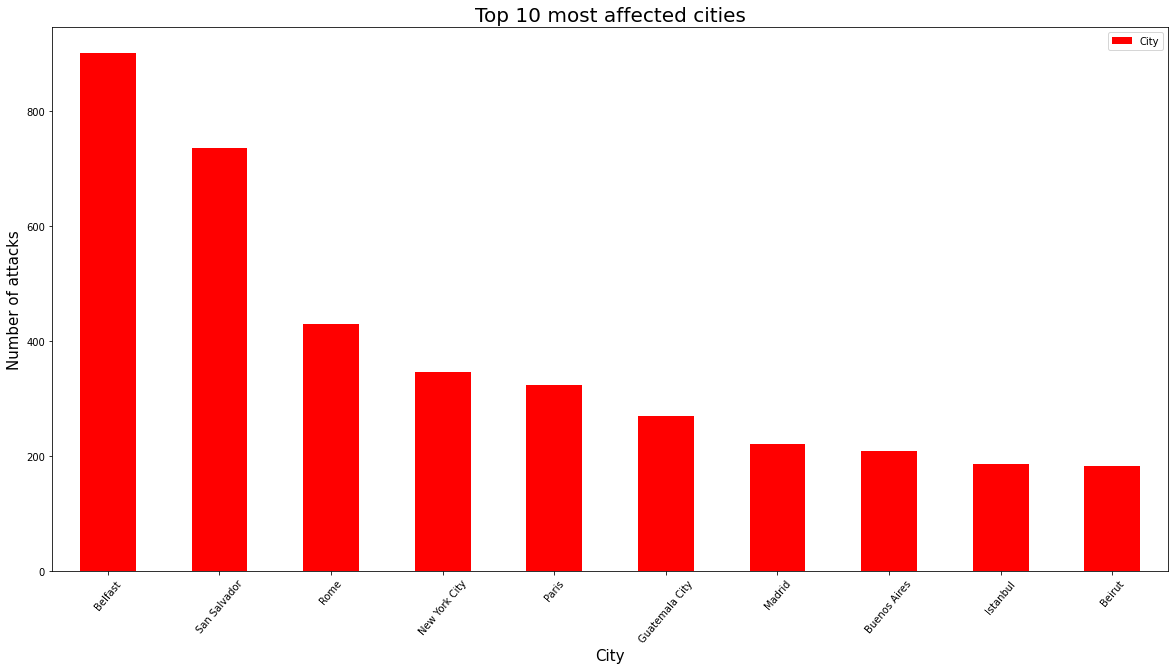

In [ ]:
terror_data['City'].value_counts().to_frame().drop('Unknown').sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top 10 most affected cities",fontsize=20)
plt.show()

Country with the most attacks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


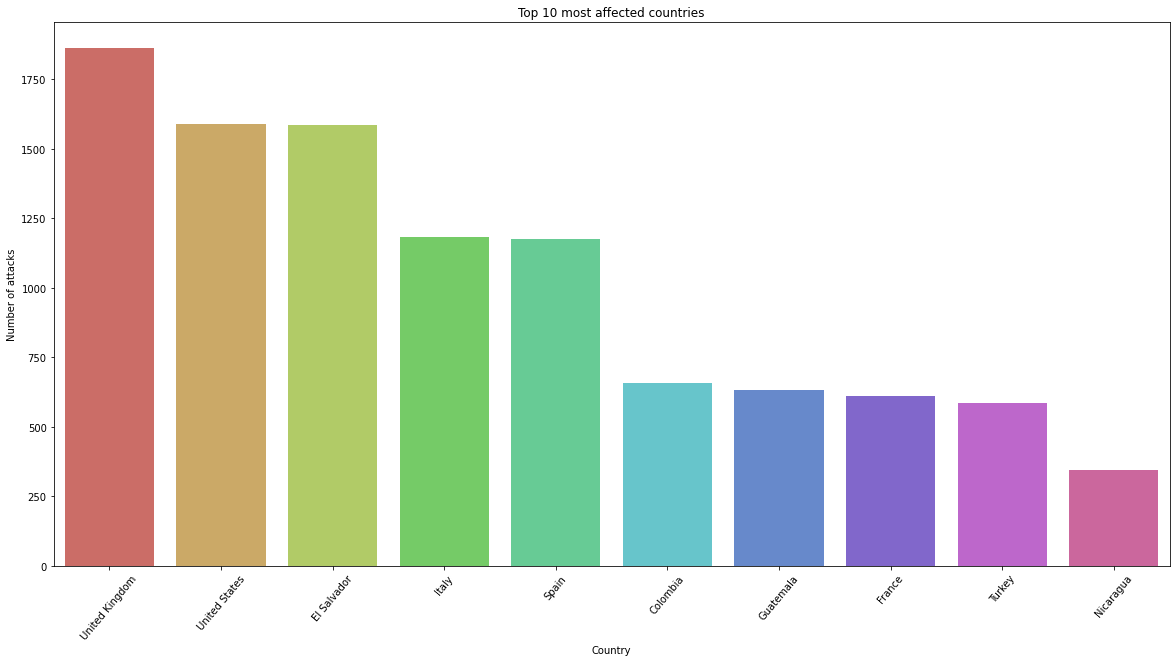

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(terror_data['Country'].value_counts()[:10].index,terror_data['Country'].value_counts()[:10].values,palette='hls')
plt.title('Top 10 most affected countries')
plt.xlabel('Country')
plt.ylabel('Number of attacks')
plt.xticks(rotation = 50)
plt.show()

Region with the most attacks

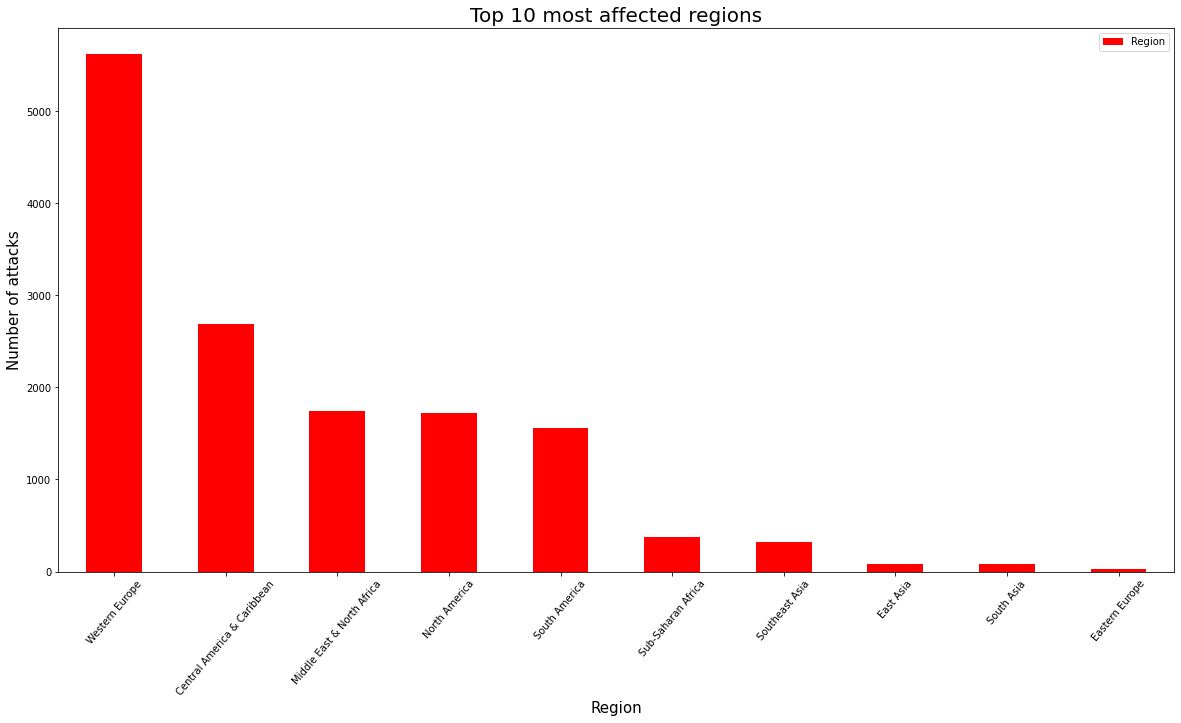

In [ ]:
terror_data['Region'].value_counts().to_frame().sort_values('Region',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 50)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top 10 most affected regions",fontsize=20)
plt.show()


Group with the most attacks

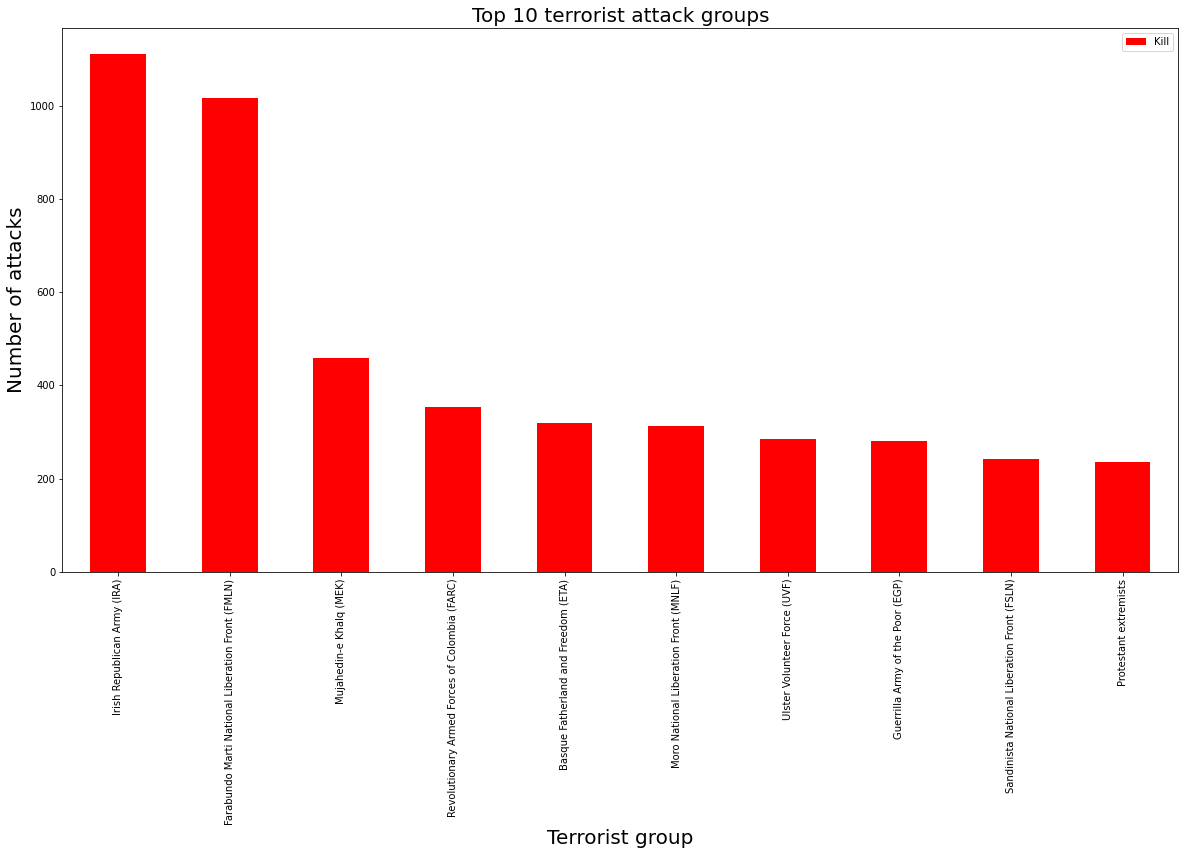

In [ ]:
terror_data[['Group','Kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('Kill',ascending=False).head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 terrorist attack groups",fontsize=20)
plt.xlabel("Terrorist group",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)
plt.show()

Target types with most attacks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


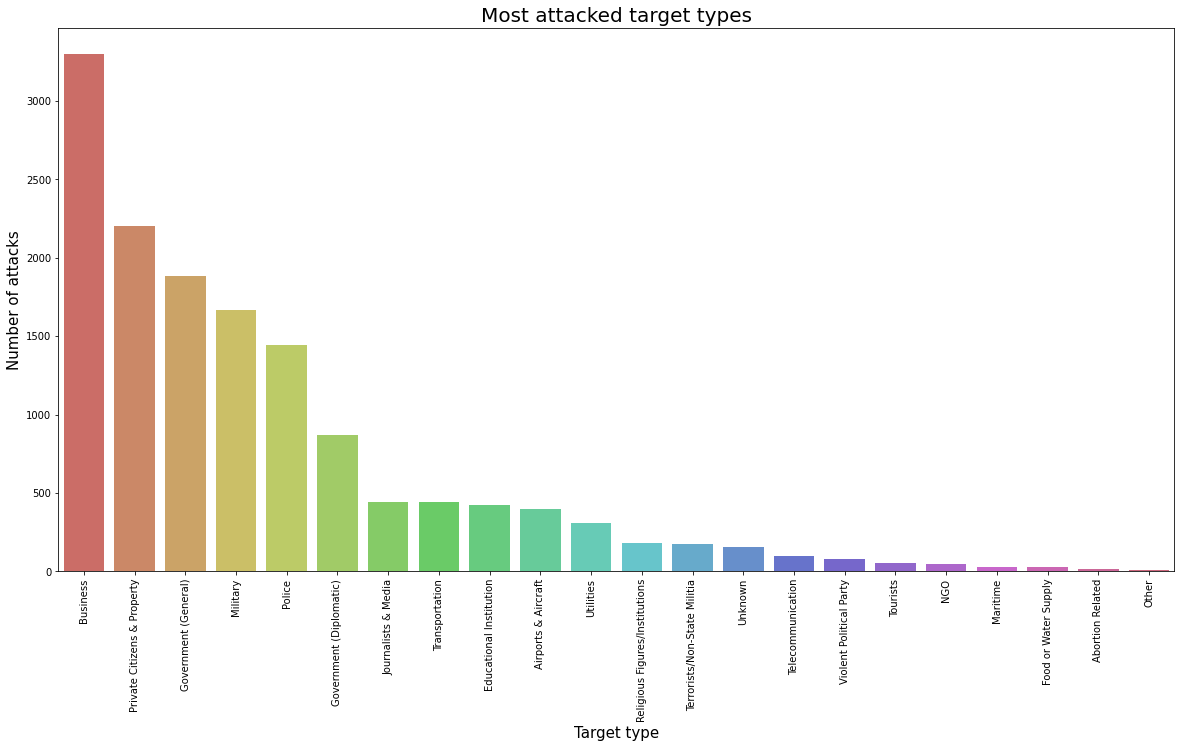

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(terror_data["targetType"],order=terror_data['targetType'].value_counts().index,palette="hls");
plt.xticks(rotation=90)
plt.xlabel("Target type",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Most attacked target types",fontsize=20)
plt.show()

Attack types with most attacks

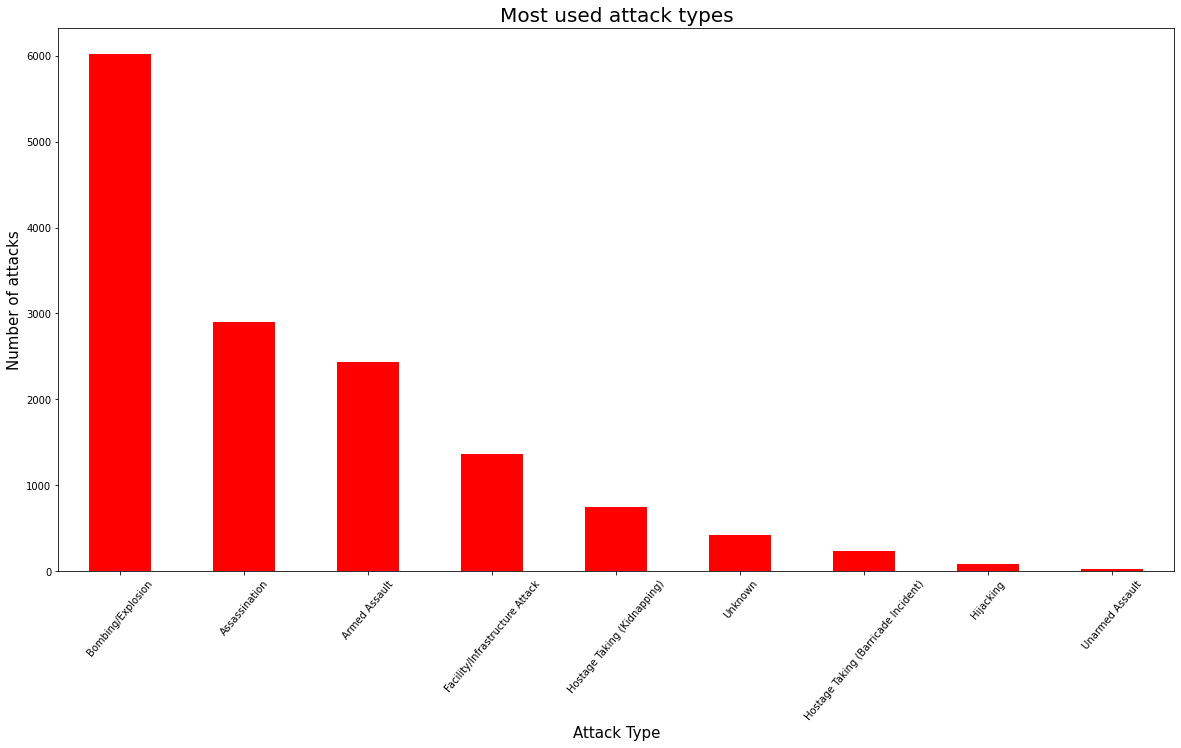

In [ ]:
terror_data['attackType'].value_counts().plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 50)
plt.xlabel("Attack Type",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Most used attack types",fontsize=20)
plt.show()

**Hot zone details**

Most attacked city - Baghdad

Most attacked country - Iraq

Most attacked region - Middle East and North Africa

Terrorist group with most attacks - Islamic State of Iraq and the Levant (ISIL)

Most attacked target type - Private Citizens and Property

Most used attack type - Bombing/Explosion